**1. Importamos librerías**

In [71]:
import numpy as np # importamos numpy como np
import pandas as pd  # importamos pandas como pd
import itertools # importamos itertools
import seaborn as sns # importamos seaborn como sns

import tensorflow as tf # importamos tensorflow como tf
from tensorflow import keras # importamos keras
from keras.models import Sequential # importamos Sequential de keras.models
from keras.layers import Dense, InputLayer, Flatten, BatchNormalization, Dropout # importamos Dense, InputLayer, Flatten, BatchNormalization, Dropout de keras.layers
from keras.utils import to_categorical # importamos to_categorical de keras.utils
from keras.regularizers import l2 # importamos l2 de keras.regularizers
from keras.layers import Conv2D, MaxPooling2D # importamos Conv2D, MaxPooling2D de keras.layers
from keras.preprocessing.image import ImageDataGenerator # importamos ImageDataGenerator de keras.preprocessing.image
import matplotlib.pyplot as plt # importamos matplotlib.pyplot como plt

print(tf.__version__) # imprimimos la versión de tensorflow

2.10.1


**2. Análisis de datos**

Lo hemos realizado en la clase anterior

**3. Preparamos los datos**

In [72]:
train_data = pd.read_csv('input\mnist_train.csv') # leemos el archivo mnist_train.csv
print('Estructura de los datos de entrenamiento: ',train_data.shape) # imprimimos la estructura de los datos de entrenamiento
train_data # imprimimos los datos de entrenamiento


Estructura de los datos de entrenamiento:  (60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
type(train_data) # imprimimos el tipo de train_data

pandas.core.frame.DataFrame

In [74]:
X = train_data.drop(['label'],axis=1) #Variable independiente, todas las columnas menos 'label'
X.head() # imprimimos las primeras 5 filas de X

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
y = train_data.label #Variable dependiente (objetivo) seria solo la columna 'label'
y.head() # imprimimos las primeras 5 filas de y

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [76]:
#Separo datos de entrenamiento y de test
import sklearn.model_selection as skmodel # importamos sklearn.model_selection como skmodel
X_train, X_test, y_train, y_test = skmodel.train_test_split(X, y, test_size=0.33, random_state=1) # separamos los datos de entrenamiento y de prueba
print("la longitud de todos los datos es ","{:}".format(len(X))) # imprimimos la longitud de todos los datos
print("la longitud del conjunto de entrenamiento es","{:}".format(len(X_train))) # imprimimos la longitud del conjunto de entrenamiento
print("la longitud del conjunto de prueba es","{:}".format(len(X_test))) # imprimimos la longitud del conjunto de prueba

la longitud de todos los datos es  60000
la longitud del conjunto de entrenamiento es 40200
la longitud del conjunto de prueba es 19800


In [77]:
X_train # imprimimos X_train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
43138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
X_test # imprimimos X_test

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
15281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:

X_train = X_train.iloc[:,:].values.reshape(-1, 28, 28, 1) # convertimos X_train en un array de 28x28x1
X_train # imprimimos X_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [80]:
y_train # imprimimos y_train

43138    9
24226    2
24123    8
33427    0
31273    8
        ..
50057    0
32511    5
5192     0
12172    9
33003    0
Name: label, Length: 40200, dtype: int64

In [81]:
X_test # imprimimos X_test

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
15281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
X_test = X_test.values.reshape(-1, 28, 28, 1) # convertimos X_test en un array de 28x28x1

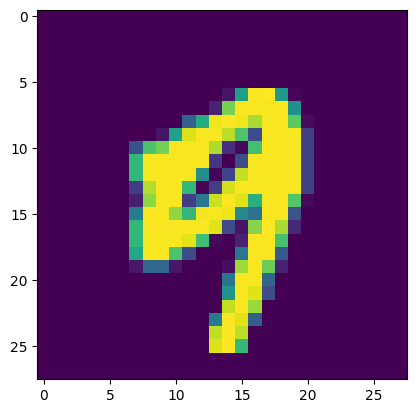

In [83]:
plt.imshow(X_train[0]) # imprimimos la imagen de X_train[0]

In [84]:
# Normalizar datos
X_train = X_train/255 # normalizamos X_train
X_test = X_test/255 # normalizamos X_test

# Paso a categoricos
y_train_cat = to_categorical(y_train,10) # convertimos y_train en un array de 10
y_test_cat = to_categorical(y_test,10) # convertimos y_test en un array de 10

In [85]:
type(y_train_cat) # imprimimos el tipo de y_train_cat

numpy.ndarray

In [86]:
y_train_cat # imprimimos y_train_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [87]:
y_train_cat.shape # imprimimos la estructura de y_train_cat

(40200, 10)

In [88]:
type(y_test_cat) # imprimimos el tipo de y_test_cat

numpy.ndarray

In [89]:
y_test_cat # imprimimos y_test_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [90]:
y_test_cat.shape # imprimimos la estructura de y_test_cat

(19800, 10)

In [91]:
X_train.shape[1:] # imprimimos la estructura de X_train

(28, 28, 1)

**4.- Modelado con Keras**

In [92]:
# build a simple model, adding additional Conv2D/MaxPooling2D layers may improve accuracy
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # definimos la capa de entrada Conv2D de 28x28x1 con la función de activación relu
    tf.keras.layers.MaxPooling2D((2, 2)),  # definimos la capa MaxPooling de salida de 2x2 
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # definimos la capa de entrada Conv2D de 28x28x1 con la función de activación relu
    tf.keras.layers.MaxPooling2D((2, 2)),  # definimos la capa de salida MaxPooling2D de 2x2 
    tf.keras.layers.Flatten(), # aplanamos la capa
    tf.keras.layers.Dense(64, activation='relu'), # definimos la capa de entrada Dense de 64 con la función de activación relu
    tf.keras.layers.Dense(10, activation='softmax') # definimos la capa de salida D4ensede 10 con la función de activación softmax
])

model.compile("Adam", "categorical_crossentropy", metrics=["accuracy"]) # compilamos el modelo con Adam, categorical_crossentropy y accuracy

*Gráficando el modelo*

Es necesario instalar pydot.

Para eso usen el siguiente comando: pip install pydot

pydot tiene como requisito tener instalado el software graphviz

Lo pueden descargar desde: https://graphviz.gitlab.io/download/

En esta pagina se encuentran los instaladores, para todos los sistemas operativos soportados.


In [93]:
keras.utils.plot_model(model, 'modelo_cnn_numeros_manuscritos.png') # imprimimos el modelo

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Nuestro modelo se presenta de la siguiente forma gráfica:

<img src="modelo_cnn_numeros_manuscritos.png">

 Podemos mostrar la entrada y la salida de la forma de cada capa en la gráfica ploteada.

In [94]:
keras.utils.plot_model(model, 'modelo_cnn_numeros_manuscritos_con_info.png', show_shapes=True) # imprimimos el modelo con información

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Nuestro modelo con más información se vería así:

<img src="modelo_cnn_numeros_manuscritos_con_info.png">

In [95]:
model.fit(X_train, y_train_cat, epochs=30, batch_size=128) # entrenamos el modelo con 30 epochs y un batch_size de 128

Epoch 1/30


315/315 [==============================] - 1s 3ms/step - loss: 0.2812 - accuracy: 0.9209
Epoch 2/30
315/315 [==============================] - 1s 3ms/step - loss: 0.0738 - accuracy: 0.9772
Epoch 3/30
315/315 [==============================] - 1s 3ms/step - loss: 0.0509 - accuracy: 0.9843
Epoch 4/30
315/315 [==============================] - 1s 3ms/step - loss: 0.0411 - accuracy: 0.9865
Epoch 5/30
315/315 [==============================] - 1s 3ms/step - loss: 0.0309 - accuracy: 0.9900
Epoch 6/30
315/315 [==============================] - 1s 3ms/step - loss: 0.0255 - accuracy: 0.9919
Epoch 7/30
315/315 [==============================] - 1s 3ms/step - loss: 0.0219 - accuracy: 0.9931
Epoch 8/30
315/315 [==============================] - 1s 3ms/step - loss: 0.0184 - accuracy: 0.9939
Epoch 9/30
315/315 [==============================] - 1s 3ms/step - loss: 0.0177 - accuracy: 0.9943
Epoch 10/30
315/315 [==============================] - 1s 3ms/step - loss: 0.0122 - accuracy: 0.9961
Epoch 11/3

In [96]:
score = model.evaluate(X_test, y_test_cat, verbose=0) # evaluamos el modelo con X_test y y_test_cat
print('Test loss:', score[0]) # imprimimos el test loss
print('Test accuracy:', score[1]) # imprimimos el test accuracy

Test loss: 0.06266171485185623
Test accuracy: 0.9896969795227051


**5. Evaluación**

In [97]:
# Make the predictions using the Test, unseen data after training
y_pred = model.predict(X_test).argmax(axis=1) # hacemos las predicciones con X_test

619/619 [==============================] - 1s 1ms/step


In [98]:
y_pred[:10]

array([3, 2, 7, 8, 2, 3, 5, 2, 8, 9], dtype=int64)

In [99]:
d = {'verdadero': y_test, 'predicho': y_pred} # creamos un diccionario con los valores verdaderos y predichos
df_mlp = pd.DataFrame(data=d) # convertimos el diccionario en un dataframe
df_mlp['diferencia'] = df_mlp['predicho']-df_mlp['verdadero'] # creamos una columna diferencia con la diferencia entre los valores verdaderos y predichos
df_mlp # imprimimos el dataframe

,verdadero,predicho,diferencia
15281,3,3,0
21435,2,2,0
44536,7,7,0
13518,8,8,0
47529,2,2,0
...,...,...,...
19202,4,4,0
30019,8,8,0
47950,3,3,0
24959,8,8,0


In [100]:
pd.DataFrame({'Cantidad': [(df_mlp['diferencia']<0).sum(), (df_mlp['diferencia']==0).sum(), (df_mlp['diferencia']>0).sum()]}, columns=['Cantidad'], index=['Mas pequeño', 'Cero', 'Más grande']) # imprimimos la cantidad de valores más pequeños, cero y más grandes

,Cantidad
Mas pequeño,110
Cero,19596
Más grande,94


**Matriz de confusión**

[[1916    1    0    0    1    0    5    1    1    3]
 [   0 2228    4    0    2    1    0    3    0    0]
 [   0    0 1971    1    0    0    1    7    2    0]
 [   1    0    6 2023    0    8    0    2    6    2]
 [   0    2    0    0 1873    0    3    1    3   14]
 [   1    2    0   12    0 1868    2    2    1    2]
 [   4    0    0    1    2    7 1945    0    2    0]
 [   0    5    5    2    2    0    0 2051    3    2]
 [   1    5    5    4    3    6    4    1 1863    8]
 [   2    1    1    4   13    0    0    5    3 1858]]
Matriz de confusión, sin normalización.


C:\Users\jocef\AppData\Local\Temp\ipykernel_15128\1992792422.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


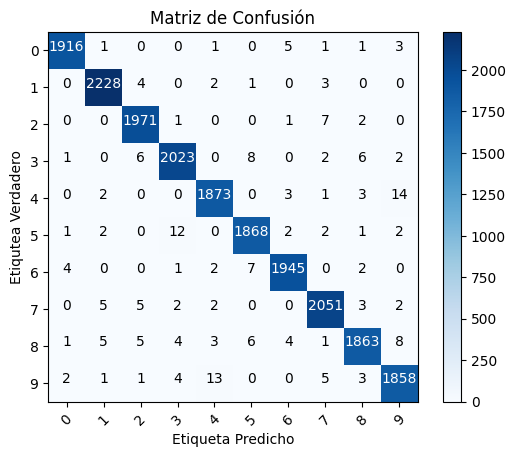

In [101]:

import sklearn.metrics as skmet # importamos sklearn.metrics como skmet

cm = skmet.confusion_matrix(y_true=y_test, y_pred=y_pred) # creamos la matriz de confusión con y_test y y_pred

# Función para graficar los resultados como una matriz de confusión
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y dibuja la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada.")
    else:
        print('Matriz de confusión, sin normalización.')
print(cm)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('Etiqutea Verdadero')
plt.xlabel('Etiqueta Predicho')
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Matriz de Confusión')

In [102]:
print("\033[1m El resultado nos dice que tenemos: ",(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9]),"predicciones correctas.") # imprimimos el resultado de las predicciones correctas
print("\033[1m El resultado nos dice que tenemos: ",(cm.sum()-(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9])),"predicciones incorrectas.") # imprimimos el resultado de las predicciones incorrectas
print("\033[1m Tenemos el total de predicciones es: ",(cm.sum())) # imprimimos el total de predicciones

 El resultado nos dice que tenemos:  19596 predicciones correctas.
 El resultado nos dice que tenemos:  204 predicciones incorrectas.
 Tenemos el total de predicciones es:  19800


**Calculamos precision, recall, f-score y support**

In [103]:
print(skmet.classification_report(y_test,y_pred)) # imprimimos el reporte de clasificación

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1928
           1       0.99      1.00      0.99      2238
           2       0.99      0.99      0.99      1982
           3       0.99      0.99      0.99      2048
           4       0.99      0.99      0.99      1896
           5       0.99      0.99      0.99      1890
           6       0.99      0.99      0.99      1961
           7       0.99      0.99      0.99      2070
           8       0.99      0.98      0.98      1900
           9       0.98      0.98      0.98      1887

    accuracy                           0.99     19800
   macro avg       0.99      0.99      0.99     19800
weighted avg       0.99      0.99      0.99     19800



En este ejemplo puede verse el empleo de la librería Keras y TensorFlow.

Esta lñibería es mucho más potente que el modelos de redes neuronales que trae sklearn.

Ya que con TensorFlow podemos crear modelos con capas internas mayores a 3 y tener un buen desempeño computacional.

En la asignatura "Desarrollo de Algoritmos de Aprendizaje Profundo" lo veremos con más detalle.